# Features 2
Acá probamos diferentes modelos para las features 2.
|hora|dia_semana|mes|es_feriado|total_bicis_salieron_global|pct_mujeres_salieron_global|pct_hombres_salieron_global|q1_edad_salieron_global|media_edad_salieron_global|q3_edad_salieron_global|pct_iconic_salieron_global|pct_fit_salieron_global|bicis_salieron_estacion_2| ... | bicis_salieron_estacion_x|llegadas_estacion_2_h1| ...|llegadas_estacion_x_h24|target_estacion_2| ... |target_estacion_x|

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import importlib

In [131]:
import models_f2 as md2
import data_processing_f2 as dp
import metrics as mt
import visualizacion_f2 as vis2
import auxiliares_f2 as aux2

In [116]:
BASE_DIR = os.getcwd()
train_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'train_dataset_features2.csv')
val_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'val_dataset_features2.csv')
test_f2_path = os.path.join(BASE_DIR, '..', '..','data', 'processed', 'features2', 'test_dataset_features2.csv')

In [117]:
train_f2 = pd.read_csv(train_f2_path)
val_f2 = pd.read_csv(val_f2_path)
test_f2 = pd.read_csv(test_f2_path)

# Modelos básicos
Corremos modelos básicos con hiperparámetros arbitrarios para ver como es la situación actual. Mostramos para cada modelo las métricas.

### 1. Predicción 202 solo con 202
Creamos un dataset que solo usa la estación de la facultad de derecho porque es la que más viajes tiene.

In [118]:
# 202
importlib.reload(dp)
df_filtrado_train_202 = dp.filtrar_dataset_por_estaciones(train_f2, [202], verbose=False)
X_train_202, y_train_202, feature_names_train_202 = dp.dividir_dataset_estacion(df_filtrado_train_202, 202)

df_filtrado_val_202 = dp.filtrar_dataset_por_estaciones(val_f2, [202], verbose=False)
X_val_202, y_val_202, feature_names_val_202 = dp.dividir_dataset_estacion(df_filtrado_val_202, 202, verbose=False)

df_filtrado_test_202 = dp.filtrar_dataset_por_estaciones(test_f2, [202], verbose=False)
X_test_202, y_test_202, feature_names_test_202 = dp.dividir_dataset_estacion(df_filtrado_test_202, 202, verbose=False)

Dataset filtrado: (12108, 5082) → (12108, 400) (estaciones: [202])
✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 400)
Features (X): (12108, 38)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 38

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset filtrado: (1950, 5082) → (1950, 400) (estaciones: [202])
Dataset dividido estación 202: X(1950, 38), y(1950,)
Dataset filtrado: (2037, 5082) → (2037, 400) (estaciones: [202])
Dataset dividido estación 202: X(2037, 38), y(2037,)


In [119]:
importlib.reload(aux2)
features = aux2.get_features(X_train_202)
print("Features for station 202:", features)
print("Features for station 202:", feature_names_train_202)

Features for station 202: [0.0, 0.0, 12.0, 2022.0, 0.0, 1.0, 1.0, 0.0, 23.0, 23.0, 23.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Features for station 202: ['hora', 'dia_semana', 'mes', 'año', 'es_feriado', 'total_bicis_salieron_global', 'pct_mujeres_salieron_global', 'pct_hombres_salieron_global', 'q1_edad_salieron_global', 'media_edad_salieron_global', 'q3_edad_salieron_global', 'pct_iconic_salieron_global', 'pct_fit_salieron_global', 'bicis_salieron_estacion_202', 'llegadas_estacion_202_h1', 'llegadas_estacion_202_h2', 'llegadas_estacion_202_h3', 'llegadas_estacion_202_h4', 'llegadas_estacion_202_h5', 'llegadas_estacion_202_h6', 'llegadas_estacion_202_h8', 'llegadas_estacion_202_h10', 'llegadas_estacion_202_h12', 'llegadas_estacion_202_h16', 'llegadas_estacion_202_h20', 'llegadas_estacion_202_h24', 'llegadas_total_h1', 'llegadas_total_h10', 'llegadas_total_h12', 'llegadas_total_h16', 'llega

In [120]:
importlib.reload(md2)
pred_202 = md2.linear_regression(X_train_202, y_train_202, X_val_202)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.1359
                Mean Squared Error                 3.6497
           Root Mean Squared Error                 1.9104
                         R-squared                 0.6572
Mean Absolute Percentage Error (%) 127717466355686368.00%
                Explained Variance                 0.6617
                     Maximum Error                13.0000
                       Correlation                 0.8152
                              Bias                 0.2190
                Relative Error (%)         2835897464.28%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2072
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8373
                Número de Mue

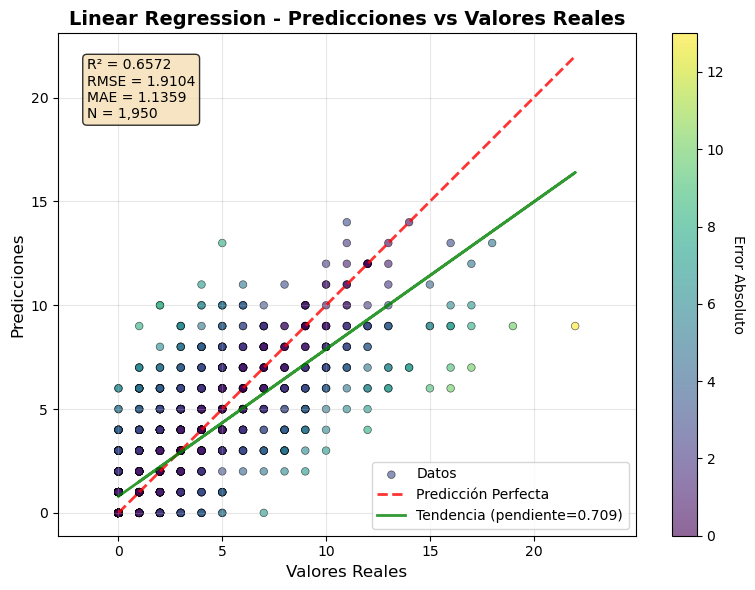

In [121]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202, "Linear Regression")

In [122]:
importlib.reload(md2)
print("Training Random Forest Regressor...")
pred_202_rf = md2.random_forest_regressor(X_train_202, y_train_202, X_val_202)
print("Training Gradient Boosting Regressor...")
pred_202_gb = md2.gradient_boosting_regressor(X_train_202, y_train_202, X_val_202)
print("Training Decision Tree Regressor...")
pred_202_dt = md2.decision_tree_regressor(X_train_202, y_train_202, X_val_202)
print("Training KNN Regressor...")
pred_202_knn = md2.knn_regressor(X_train_202, y_train_202, X_val_202)
# print("Training SVR Regressor...")
# pred_202_svr = md2.svr_regressor(X_train_202, y_train_202, X_val_202)
print("Training Ridge Regression...")
pred_202_lr_ridge = md2.ridge_regression(X_train_202, y_train_202, X_val_202)
print("Training Lasso Regression...")
pred_202_lr_lasso = md2.lasso_regression(X_train_202, y_train_202, X_val_202)


Training Random Forest Regressor...
Training Gradient Boosting Regressor...
Training Decision Tree Regressor...
Training KNN Regressor...
Training Ridge Regression...
Training Lasso Regression...


In [123]:
# comparación de modelos
importlib.reload(mt)
modelos_predicciones = {'Linear Regression' : pred_202,
        'Random Forest Regressor' : pred_202_rf,
        'Gradient Boosting Regressor' : pred_202_gb,
        'Decision Tree Regressor' : pred_202_dt,
        'KNN Regressor' : pred_202_knn,
        # 'SVR Regressor' : pred_202_svr,
        'Ridge Regression' : pred_202_lr_ridge,
        'Lasso Regression' : pred_202_lr_lasso}

mt.tabla_metricas_modelos(modelos_predicciones, y_val_202)


🏆 MEJOR MODELO: Random Forest Regressor
   R² = 0.6998 | RMSE = 1.7876 | MAE = 0.9338


,Rank,Modelo,MAE,RMSE,R²,MAPE (%),Correlación,N_Muestras
0,1,Random Forest Regressor,0.9338,1.7876,0.6998,5.704560e+16,0.8452,1950
1,2,Gradient Boosting Regressor,0.9595,1.8146,0.6907,6.559089e+16,0.8371,1950
2,3,Linear Regression,1.1359,1.9104,0.6572,1.277175e+17,0.8152,1950
3,4,Ridge Regression,1.1503,1.9169,0.6548,1.332604e+17,0.8141,1950
4,5,Lasso Regression,1.3703,1.9933,0.6268,2.228704e+17,0.8033,1950
5,6,KNN Regressor,1.0723,2.0470,0.6064,6.074086e+16,0.8072,1950
6,7,Decision Tree Regressor,1.6354,2.6034,0.3633,1.993132e+17,0.7065,1950


### 2. Predicción 202 con populares
Predecimos: 202 (Facultad de Derecho)
Estaciones en features:
- 202 (Facultad de Derecho)
- 5 (Plaza Italia)
- 175 (Constitución)
- 14 (Pacifico)
- 130 (Retiro II)


In [ ]:
# 202 con más estaciones populares
importlib.reload(dp)
df_filtrado_train_202_populares = dp.filtrar_dataset_por_estaciones(train_f2, [202, 5, 175, 14, 130], verbose=False)
X_train_202_populares, y_train_202_populares, feature_names_train_202_populares = dp.dividir_dataset_estacion(df_filtrado_train_202_populares, 202)

df_filtrado_val_202_populares = dp.filtrar_dataset_por_estaciones(val_f2, [202, 5, 175, 14, 130], verbose=False)
X_val_202_populares, y_val_202_populares, feature_names_val_202_populares = dp.dividir_dataset_estacion(df_filtrado_val_202_populares, 202, verbose=False)

Dataset filtrado: (12108, 5082) → (12108, 452) (estaciones: [202, 5, 175, 14, 130])
✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 452)
Features (X): (12108, 90)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 90

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset filtrado: (1950, 5082) → (1950, 452) (estaciones: [202, 5, 175, 14, 130])
Dataset dividido estación 202: X(1950, 90), y(1950,)


In [125]:
importlib.reload(md2)
pred_202_populares = md2.linear_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.1446
                Mean Squared Error                 3.6236
           Root Mean Squared Error                 1.9036
                         R-squared                 0.6596
Mean Absolute Percentage Error (%) 139727065362007696.00%
                Explained Variance                 0.6660
                     Maximum Error                12.0000
                       Correlation                 0.8186
                              Bias                 0.2605
                Relative Error (%)         3102564129.61%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2487
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8782
                Número de Mue

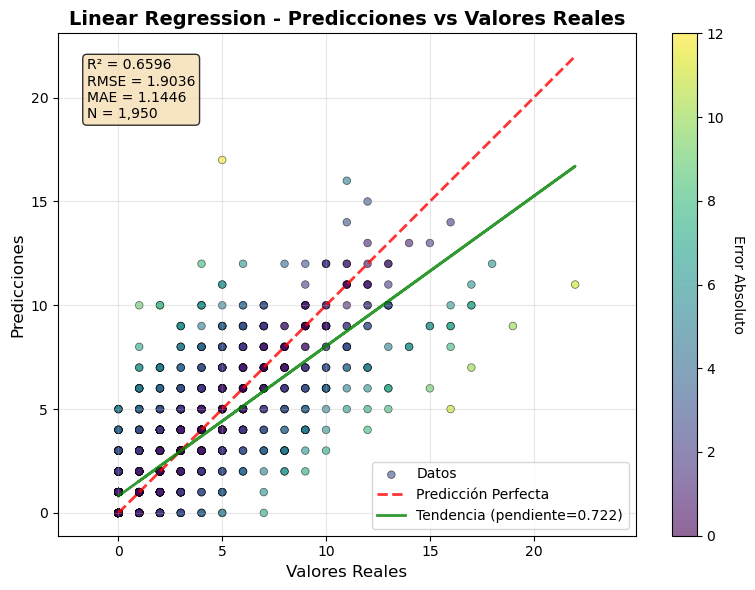

In [126]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202_populares, "Linear Regression")

In [127]:
importlib.reload(md2)
print("Training Random Forest Regressor on popular stations...")
pred_202_pop_rf = md2.random_forest_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Gradient Boosting Regressor on popular stations...")
pred_202_pop_gb = md2.gradient_boosting_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Decision Tree Regressor on popular stations...")
pred_202_pop_dt = md2.decision_tree_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training KNN Regressor on popular stations...")
pred_202_pop_knn = md2.knn_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
# print("Training SVR Regressor on popular stations...")
# pred_202_pop_svr = md2.svr_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Ridge Regression on popular stations...")
pred_202_pop_lr_ridge = md2.ridge_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Lasso Regression on popular stations...")
pred_202_pop_lr_lasso = md2.lasso_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)

Training Random Forest Regressor on popular stations...
Training Gradient Boosting Regressor on popular stations...
Training Decision Tree Regressor on popular stations...
Training KNN Regressor on popular stations...
Training Ridge Regression on popular stations...
Training Lasso Regression on popular stations...


In [128]:
# Comparación modelos
importlib.reload(mt)
modelos_predicciones_populares = {
    'Linear Regression': pred_202_populares,
    'Random Forest Regressor': pred_202_pop_rf,
    'Gradient Boosting Regressor': pred_202_pop_gb,
    'Decision Tree Regressor': pred_202_pop_dt,
    'KNN Regressor': pred_202_pop_knn,
    # 'SVR Regressor': pred_202_pop_svr,
    'Ridge Regression': pred_202_pop_lr_ridge,
    'Lasso Regression': pred_202_pop_lr_lasso
}
mt.tabla_metricas_modelos(modelos_predicciones_populares, y_val_202_populares)


🏆 MEJOR MODELO: Random Forest Regressor
   R² = 0.6931 | RMSE = 1.8075 | MAE = 0.9482


,Rank,Modelo,MAE,RMSE,R²,MAPE (%),Correlación,N_Muestras
0,1,Random Forest Regressor,0.9482,1.8075,0.6931,5.727655e+16,0.8406,1950
1,2,Gradient Boosting Regressor,0.9569,1.8328,0.6845,6.305039e+16,0.8337,1950
2,3,Linear Regression,1.1446,1.9036,0.6596,1.397271e+17,0.8186,1950
3,4,Ridge Regression,1.1472,1.9056,0.6589,1.411128e+17,0.8183,1950
4,5,Lasso Regression,1.3656,1.9904,0.6279,2.217157e+17,0.8038,1950
5,6,KNN Regressor,1.0887,2.0682,0.5982,6.189563e+16,0.8041,1950
6,7,Decision Tree Regressor,1.4323,2.7797,0.2742,7.182664e+16,0.6838,1950


# Predecir todas las estaciones
- solo con si mismas (para cada una)

In [ ]:
importlib.reload(dp)
targets =  dp.obtener_targets_disponibles(train_f2)

Targets disponibles: 362 estaciones


In [142]:
lin_reg_all = []
lin_reg_true = []
importlib.reload(md2)
importlib.reload(dp)

for i in range(len(targets)):
    if i % 10 == 0:
        print(f"Training Linear Regression for station {targets[i]}...")
    df_filtrado_train = dp.filtrar_dataset_por_estaciones(train_f2, [targets[i]], verbose=False)
    X_train, y_train, feature_names_train = dp.dividir_dataset_estacion(df_filtrado_train, targets[i], verbose=False)
    
    df_filtrado_val = dp.filtrar_dataset_por_estaciones(val_f2, [targets[i]], verbose=False)
    X_val, y_val, feature_names_val = dp.dividir_dataset_estacion(df_filtrado_val, targets[i], verbose=False)
    lin_reg_true.append(y_val)
    
    pred = md2.linear_regression(X_train, y_train, X_val)
    lin_reg_all.append(pred)

Training Linear Regression for station 2...
Training Linear Regression for station 14...
Training Linear Regression for station 30...
Training Linear Regression for station 45...
Training Linear Regression for station 59...
Training Linear Regression for station 71...
Training Linear Regression for station 85...
Training Linear Regression for station 98...
Training Linear Regression for station 117...
Training Linear Regression for station 132...
Training Linear Regression for station 151...
Training Linear Regression for station 165...
Training Linear Regression for station 177...
Training Linear Regression for station 190...
Training Linear Regression for station 204...
Training Linear Regression for station 219...
Training Linear Regression for station 234...
Training Linear Regression for station 251...
Training Linear Regression for station 262...
Training Linear Regression for station 275...
Training Linear Regression for station 302...
Training Linear Regression for station 323.

In [149]:
importlib.reload(mt)
mt.estadisticas_metricas_por_estacion(lin_reg_true, lin_reg_all, targets)


📊 Calculando métricas para 362 estaciones...
📈 Total de muestras: 362

📈 RESUMEN OPTIMIZADO:
   • Estaciones analizadas: 362
   • Muestras procesadas: 362
   • Promedio muestras/estación: 1.0
   • Métricas calculadas: 5

🏆 R² - MEJOR: Est.175 (0.7548) | PEOR: Est.471 (-0.2706)

✅ RMSE - MEJOR: Est.31 (0) | PEOR: Est.175 (2.912)

✅ MAE - MEJOR: Est.31 (0) | PEOR: Est.175 (1.833)

✅ MAPE - MEJOR: Est.504 (36.85) | PEOR: Est.443 (99.7)


,Métrica,Mínimo,Estación_Min,Máximo,Estación_Max,Promedio,Mediana,Desv_Est,P25,P75,Rango,CV_%,N_Estaciones
0,MAE,0.0000,31,1.8330,175,0.4885,0.4405,0.2545,0.3073,0.6095,1.833,52.10,362
1,RMSE,0.0000,31,2.9120,175,0.9790,0.9466,0.3924,0.6897,1.1710,2.912,40.08,362
2,R²,-0.2706,471,0.7548,175,0.3361,0.3506,0.2020,0.1954,0.5066,1.025,60.10,362
3,MAPE,36.8500,504,99.7000,443,53.9700,52.4400,8.9230,48.4100,58.3900,62.850,16.53,354


# Visualización de las features 2
Hacemos PCA y visualizamos, imprimimos estadísticas descriptivas y graficamos las distribuciones de las features. Cualquier cosa que ayude.

Eliminando el 20% superior de las muestras (target > 5.0)
Muestras originales: 12108, Muestras filtradas: 9933


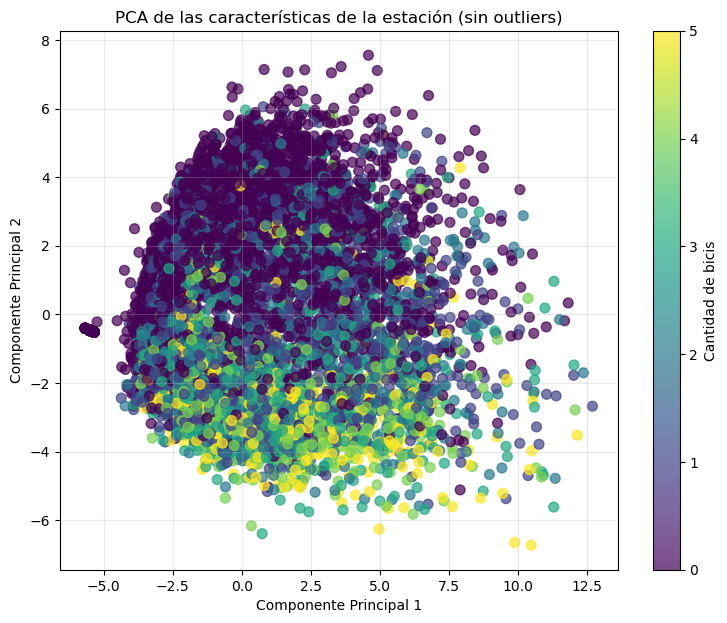

Varianza explicada por los 2 primeros componentes: 42.95%
Componente 1: 24.74%
Componente 2: 18.22%

🏆 TOP 3 FEATURES MÁS IMPORTANTES:
1. llegadas_total_h1 (Importancia: 0.4555)
   PC1: 0.2391, PC2: -0.2164
2. llegadas_total_h8 (Importancia: 0.4389)
   PC1: 0.1781, PC2: 0.2609
3. llegadas_total_h2 (Importancia: 0.4290)
   PC1: 0.2795, PC2: -0.1495

📊 TOP 10 FEATURES:
----------------------------------------------------------------------
 1. llegadas_total_h1                   | Total: 0.4555 | PC1: 0.2391 | PC2: -0.2164
 2. llegadas_total_h8                   | Total: 0.4389 | PC1: 0.1781 | PC2: 0.2609
 3. llegadas_total_h2                   | Total: 0.4290 | PC1: 0.2795 | PC2: -0.1495
 4. total_bicis_salieron_global         | Total: 0.4279 | PC1: 0.1587 | PC2: -0.2692
 5. llegadas_total_h6                   | Total: 0.4279 | PC1: 0.2635 | PC2: 0.1644
 6. llegadas_total_h5                   | Total: 0.3855 | PC1: 0.2912 | PC2: 0.0943
 7. llegadas_total_h24                  | Total: 0.3

In [129]:
importlib.reload(vis2)
pca_model, scaler_model = vis2.graficar_pca(X_train_202, y_train_202)

# Feature engineering
Acomodamos features, relacionamos, sacamos, reducimos la dimensionalidad, etc. para mejorar el modelo en base a lo que vimos en la visualización.

# Cross validation
Elegimos los óptimos hiperparámetros.

# Entrenamientos finales
Entrenamos los modelos finales con los hiperparámetros óptimos y guardamos los resultados.